# Nearest Neighbors

_source_: https://scikit-learn.org/stable/modules/neighbors.html

In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

 ## Unsupervised Nearest Neighbors

### Finding the Nearest Neighbors

In [2]:
X = np.array([
    [-1, -1], [-2, -1], [-3, -2], 
    [1, 1], [2, 1], [3, 2]
])

nbrs = NearestNeighbors(n_neighbors=2, algorithm="ball_tree").fit(X)
distances, indices = nbrs.kneighbors(X)

In [3]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [4]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [5]:
# Sparse Graph showing the connections between neighboring points
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

In [6]:
nbrs.kneighbors([[2,3]], 1, return_distance=False) 

array([[5]])

### KDTree and BallTree Classes

In [7]:
from sklearn.neighbors import KDTree

kdt = KDTree(X, metric="euclidean")
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

## Nearest Neighbors Classification

**Sample usage of Nearest Neighbors classification. It will plot the decision boundaries for each class.**

_Source_: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

In [8]:
from sklearn.neighbors import KNeighborsClassifier

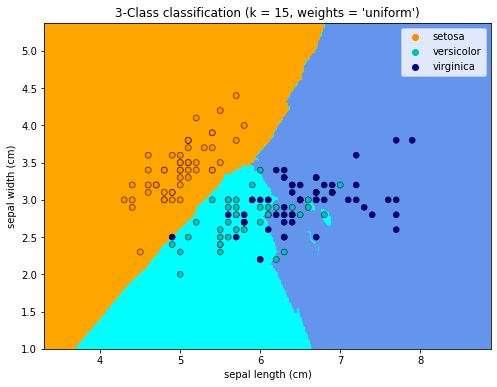

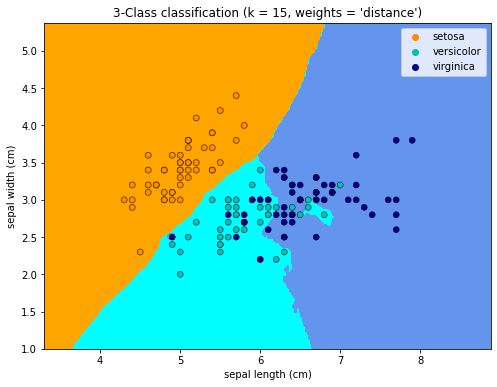

In [9]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# whe only take the first two features. We could avoid this ungly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X,y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    sns.scatterplot(
        x = X[:, 0],
        y = X[:, 1],
        hue = iris.target_names[y],
        palette = cmap_bold,
        alpha = 1.0,
        edgecolor = "black"
    )
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    
plt.show()

## Nearest Neighbors Regression

### Nearest Neighbors regression

_Source_: https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py

In [10]:
from sklearn.neighbors import KNeighborsRegressor

**Generate sample data**

In [11]:
np.random.seed(0)

X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 300)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

**Fit regression model**

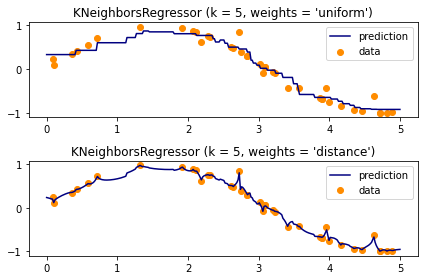

In [12]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

### Face completion with a multi-output estimators

In [13]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

**Load the faces datasets**

In [14]:
data, targets = fetch_olivetti_faces(return_X_y=True)

In [15]:
train = data[targets < 30]
test = data[targets >= 30]

**Test on a subset of people**

In [16]:
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

In [17]:
n_pixels = data.shape[1]

X_train = train[:, : (n_pixels + 1) // 2] # Upper half of the faces
y_train = train[:, n_pixels // 2 :] # Lower half of the faces

X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

**Fit estimators**

In [18]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": RidgeCV()
}

In [19]:
y_test_predict = dict()

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

**Plot the completed faces**

In [52]:
image_shape = (64, 64)
n_cols = 1 + len(ESTIMATORS)

plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

Text(0.5, 0.98, 'Face completion with multi-output estimators')

<Figure size 720x813.6 with 0 Axes>

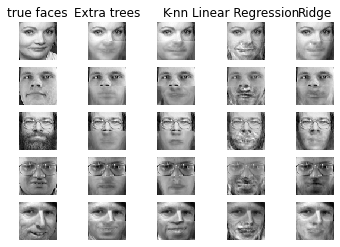

In [55]:
for i in range(n_faces):
    
    true_face = np.hstack((X_test[i], y_test[i]))
    
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    
    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()


## Nearest Centroid Classifier